In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pickle
import sys

modules_route = str(os.getcwd()).replace("\\", "/")+"/Modules/"
sys.path.insert(0, modules_route)

import waver as wv
import WavePlotter as wp
import WaveUmaper as wu

In [2]:
colormap = {'capta_002' : 'sienna',
            'capta_003' : 'g', 
            'capta_004' : 'r', 
            'campus_miraflores' : 'c', 
            'mma' : 'y',
            'control_acustico' : 'navy', 
            'vit_global' : 'olive'}

In [10]:
#Create a class Wavs, will ask for a dataframe in txt forman with 'space' separation
wavs = wv.Wavs()
wavs.metadata = wavs.metadata.drop_duplicates(subset = ['filename'], keep = 'first')
wavs.metadata = wavs.metadata.reset_index()
wavs.metadata = wavs.metadata.drop(['index'], axis = 1)
wavs.metadata

Selection: /home/kasparov/Documentos/20190114_vpoblete/20221210_dataset_AUMILAB_processing/fusa_noise/data/metadata.txt


,filename,start,end,label,station,labeller
0,1654237560_1654237620.wav,0.338028,4.225351,dog,capta_002,Cristian_C
1,1654237499_16542375591.wav,2.579999,5.919998,dog,capta_002,Cristian_C
2,1654237439_16542374991.wav,0.325000,2.337851,dog,capta_002,Cristian_C
3,1654237378_16542374381.wav,1.435714,3.171427,dog,capta_002,Cristian_C
4,1654237257_16542373171.wav,1.260000,1.719999,dog,capta_002,Cristian_C
...,...,...,...,...,...,...
6027,62f89f11ff16b865defa115d.wav,0.083218,60.000000,rain,capta_002,Esteban_V
6028,62f88fbeff16b865defa1072.wav,0.249653,2.496533,wind,capta_002,Esteban_V
6029,62f88f93ff16b865defa106e.wav,0.000000,4.077670,wind,capta_002,Esteban_V
6030,62f87c92ff16b865defa0ec2.wav,6.490985,7.572816,wind,capta_002,Esteban_V


In [11]:
#This function will track all audios and add usefull values, as argument need a threshold (duration in seconds)
#First, will ask for audios directory (any directory that you want to be classified)
#      DIRECTORY FOLDERS NAME WILL BE ALSO DE LABEL OF THE AUDIO PACK!!!!
#      You will get a dataframe with cols:
#        -> ['filename', 'original wav', 'label', 'station', 'duration', 'power']
#
#Second, program will ask when finished the classification a folder to export the dataframe
#        -> name will be folders name + .txt,   example noise.txt
wavs.classifier(0.5)

wind folder is being classified
Reading 62f3fed76d3b299834eaf415_wind_17043.wav
2342 / 2342
Ignored audios [threshold = 0.500000 sec]: 3
capta_002
Data exported at: /home/kasparov/Documentos/20190114_vpoblete/20221210_dataset_AUMILAB_processing/fusa_noise/data/threshold_05/wind.txt


In [6]:
#Select dataframe generated in wavs.classifier(treshold) (like bells.txt or noise.txt)

a_plot = wp.WavePlot()

Selection: /home/kasparov/Documentos/20190114_vpoblete/20221210_dataset_AUMILAB_processing/fusa_noise/data/threshold_05/noise.txt


Working at: /home/kasparov/Documentos/20190114_vpoblete/20221210_dataset_AUMILAB_processing/fusa_noise/audio/noise
62d0d6dc7a2acbde063e7512_ruido_7619.wav
5361 / 5361


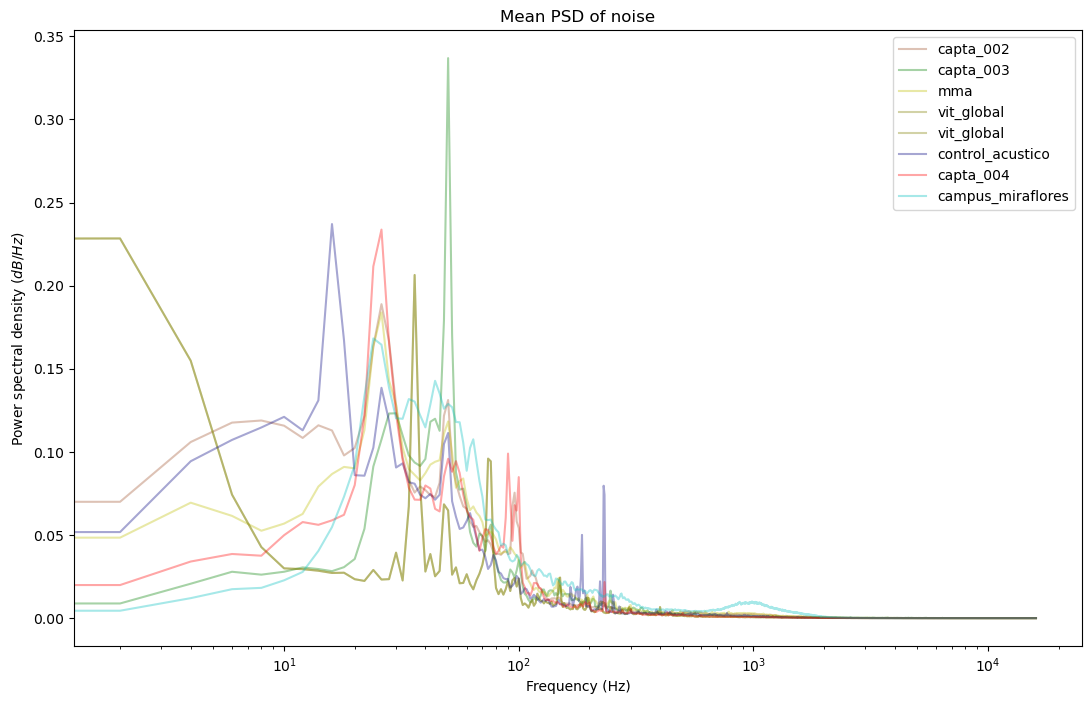

In [7]:
# # fig, ax = plt.subplots()
# # ax1 = bells.Mean_Power_Spectral_Density(color = colormap)

a_plot.Mean_Power_Spectral_Density(color = colormap)

In [8]:
with open(os.getcwd()+'/data/psd/noise.psd', "wb") as f:
    pickle.dump(a_plot.plotdata, f)

In [2]:
#ask for selection of dataframe (generated from wavs.classifier) 
umaper = wu.Umaper()

In [3]:
#Ask for an origin folder (wavs)
#Then ask for a destiny folder (npz)

umaper.NPZ_generator()

Working in air_conditioner folder
3 / 3
Exporting EM2030-00750-2022-05-31T10-15-15-062dB_air_conditioner_25692.npz in Z:/Proyectos/fusa-training/NPZ/air_conditioner
